In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.
Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

* Use the Matplotlib and Seaborn libraries.

In [89]:
# Dependencies
# import json
import tweepy
import twtapis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [148]:
# Twitter API Keys
consumer_key = twtapis.consumer_key
consumer_secret = twtapis.consumer_secret
access_token = twtapis.access_token
access_token_secret = twtapis.access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [253]:
# Target Users - BBC, CBS, CNN, Fox, and New York times
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews","@nytimes"]

# # Variables for holding sentiments
outlets = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_counter = []

# Loop through all target users
for target in target_users:

        public_tweets = api.user_timeline(target, count=100, result_type="recent") #page = x//count=100, result_type="recent"
        
        tweet_number = 100

        # Loop through all tweets
        for tweet in public_tweets: #["statuses"]

            # Run Vader Analysis on each tweet
            scores = analyzer.polarity_scores(tweet['text'])
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']
            
            tweet_number -= 1
            #print(tweet_number)
            
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            outlets.append(target)
            tweet_counter.append(tweet_number)
            
            sentiments = {"User": outlets,
                          "Date": tweet["created_at"],
                          "Compound": compound_list,
                          "Positive": positive_list,
                          "Negative": neutral_list,
                          "Neutral": negative_list,
                         "Tweet_Count": tweet_counter}

#print(sentiments)

In [254]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet_Count,User
0,-0.3182,Sat Dec 09 21:09:02 +0000 2017,0.905,0.095,0.0,99,@BBCWorld
1,-0.4404,Sat Dec 09 21:09:02 +0000 2017,0.775,0.225,0.0,98,@BBCWorld
2,0.0000,Sat Dec 09 21:09:02 +0000 2017,1.000,0.000,0.0,97,@BBCWorld
3,0.0000,Sat Dec 09 21:09:02 +0000 2017,1.000,0.000,0.0,96,@BBCWorld
4,0.0000,Sat Dec 09 21:09:02 +0000 2017,1.000,0.000,0.0,95,@BBCWorld


In [255]:
# Save data to csv
sentiments_pd.to_csv('news_sentiments.csv')

In [256]:
# Pivot DataFrame for plotting 

user_sentiments = sentiments_pd.pivot(index="Tweet_Count", columns="User", values="Compound")
user_sentiments.head()

User,@BBCWorld,@CBSNews,@CNN,@FoxNews,@nytimes
Tweet_Count,,,,,
0,-0.8225,0.0000,-0.3612,0.5267,0.5574
1,0.0000,0.0000,-0.8500,0.0000,0.5719
2,-0.7717,-0.9042,0.3818,0.5994,0.0000
3,-0.2263,0.6597,0.0000,-0.4588,0.4019
4,-0.4588,0.4019,0.7579,0.0000,-0.7845


The first plot will be and/or feature the following:
* Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the compound sentiment of a tweet.
* Sort each plot point by its relative timestamp.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


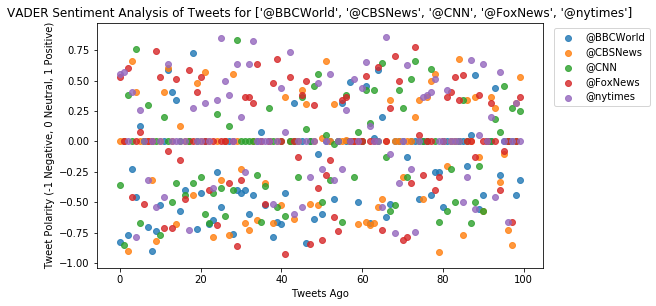

In [257]:
# Create compound scores on scatter plot

x_values = np.arange(100)

fig = plt.figure(figsize=(8, 4.5))

for user in target_users:
    
    plt.scatter(x_values, user_sentiments[user], marker="o", alpha=0.8)

# add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# plt.plot(user_sentiments["User"], marker="o",o linewidth=0.5,
#          alpha=0.8)

# # Add title and labels
plt.title(f"VADER Sentiment Analysis of Tweets for {target_users}")
plt.ylabel("Tweet Polarity (-1 Negative, 0 Neutral, 1 Positive)")
plt.xlabel("Tweets Ago")
# save plot
plt.savefig('news_sentiments_scatter.png')

plt.show()

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.

In [258]:
# Overall Sentiments

# group by User
grouped_news = sentiments_pd.groupby('User')

# calculate mean on compound scores
grouped_compound = grouped_news['Compound'].mean()

grouped_compound

User
@BBCWorld   -0.190595
@CBSNews    -0.085541
@CNN        -0.068167
@FoxNews     0.004244
@nytimes     0.063103
Name: Compound, dtype: float64

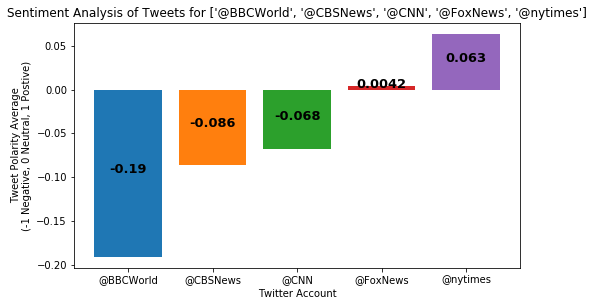

In [260]:
# Create plot
# plot mean compound scores
x_values = np.arange(len(target_users))

plot_data = zip(x_values, target_users)

fig = plt.figure(figsize=(8, 4.5))

for x, user in plot_data:
    
    y = grouped_compound[user]
    
    plt.bar(x, y)
    plt.text(x, y/2, '{:.2}'.format(y),
             horizontalalignment='center', color='black',
             fontsize=13, weight='bold')

# change xticks to news sources
plt.xticks(x_values, target_users)


# # Add title and labels
plt.title(f"Sentiment Analysis of Tweets for {target_users}")
plt.ylabel("Tweet Polarity Average\n(-1 Negative, 0 Neutral, 1 Postive)")
plt.xlabel("Twitter Account")
plt.savefig('news_sentiments_polarity_bar.png')
plt.show()

As final considerations:
* Include a written description of three observable trends based on the data.

## Obervations

1. I ran this both with @BBC & @CBS accounts, and with their News accounts (@BBCWorld, @CBSnews). The latter are included in this analysis. There is a great variation between the different accounts. The general ones include info on TV programming and non-News items. The News accounts are markedly more negative.

2. There doesn't appear to be much consistency in timing of tweet polarity. The score can vary from one tweet to the next. 

3. Going off of the analysis involving news accounts (@BBCWorld/@CBSNews) the majority of the last 100 tweets from the 5 accounts gets a negative VADER score.

Include an exported markdown version of your Notebook called  README.md in your GitHub repository.